# Notebook Imports 

In [1]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather data

In [2]:
boston_datasets = load_boston()
# boston_datasets

In [3]:
dir(boston_datasets)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_datasets.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = pd.DataFrame(data=boston_datasets.data, columns=boston_datasets.feature_names)
data['PRICE'] = boston_datasets.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.count() # num of rows 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## cleaning the data

In [8]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Descriptive statistics

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation: 
### =>measure of the linear relationship between two quantitative variables .

## $$ \rho_{XY} = corr(X, Y) $$
## $$ -1.0 \leq \rho_{XY} \leq 1.0 $$ 

In [11]:
data['PRICE'].corr(data['RM'])

0.6953599470715391

In [12]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [13]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

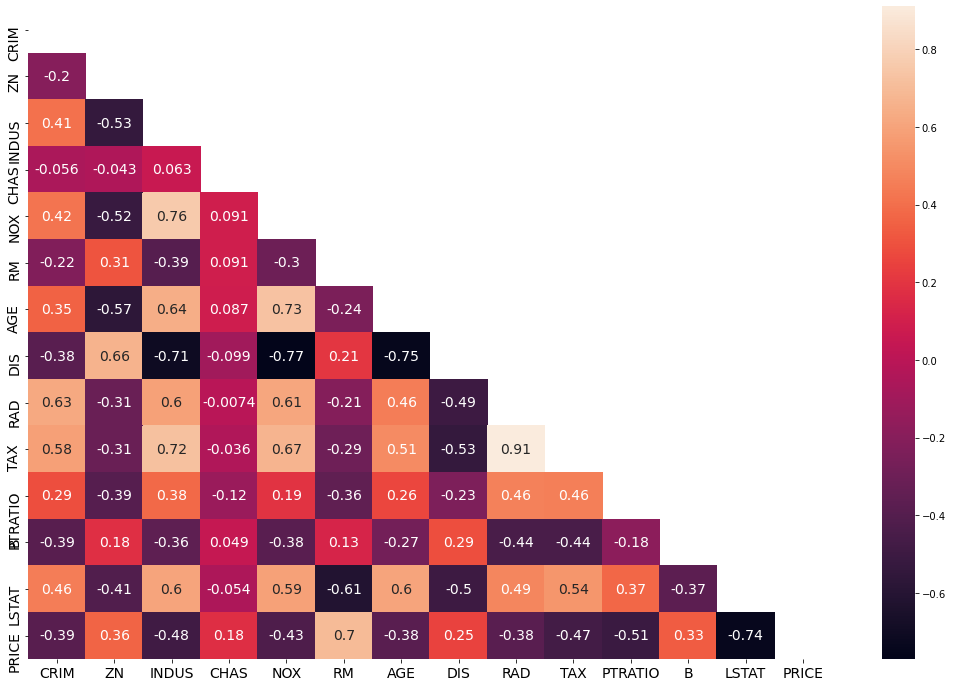

In [15]:
plt.figure(figsize=[18,12])

sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

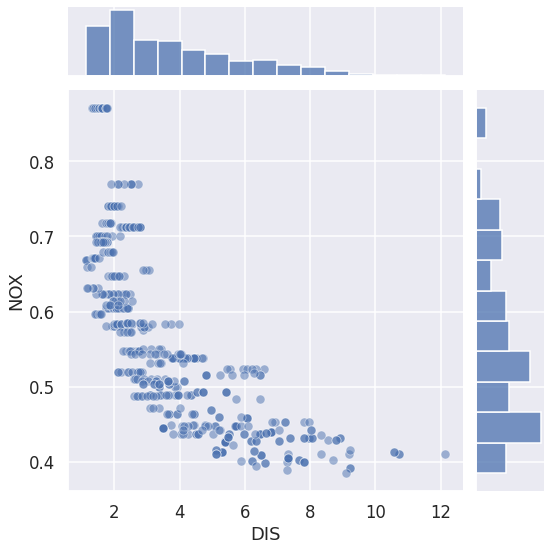

In [16]:
# using seaborn

sns.set() # set the defalut style
sns.set_context('talk')

sns.jointplot(x=data['DIS'], y=data['NOX'], height=8, joint_kws={"alpha":0.5})

plt.show()

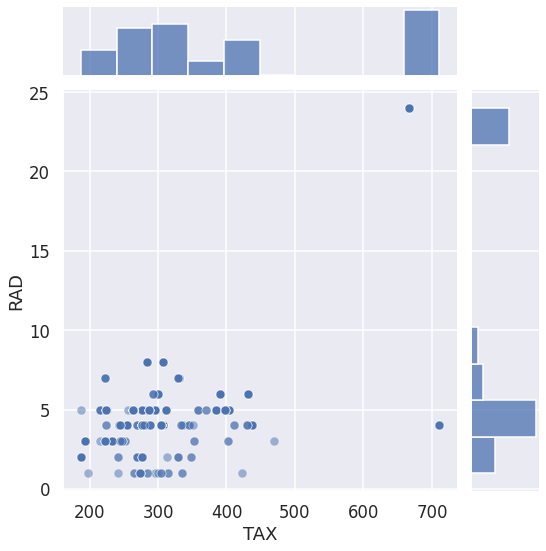

In [17]:
# using seaborn

sns.set() # set the defalut style
sns.set_context('talk')

sns.jointplot(x=data['TAX'], y=data['RAD'], height=8, joint_kws={"alpha":0.5})

plt.show()

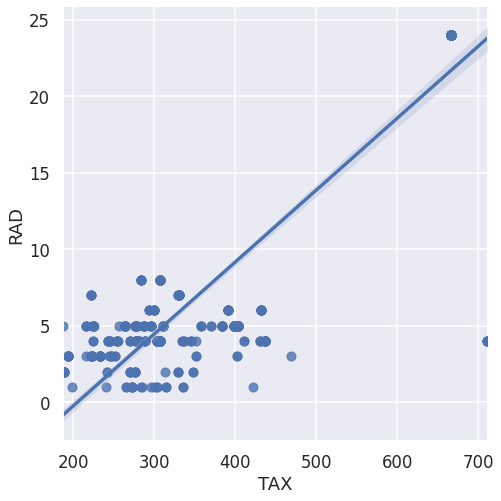

In [18]:
# using liner regression with seaborn
sns.lmplot(x='TAX', y='RAD', data=data, height=7)
plt.show()

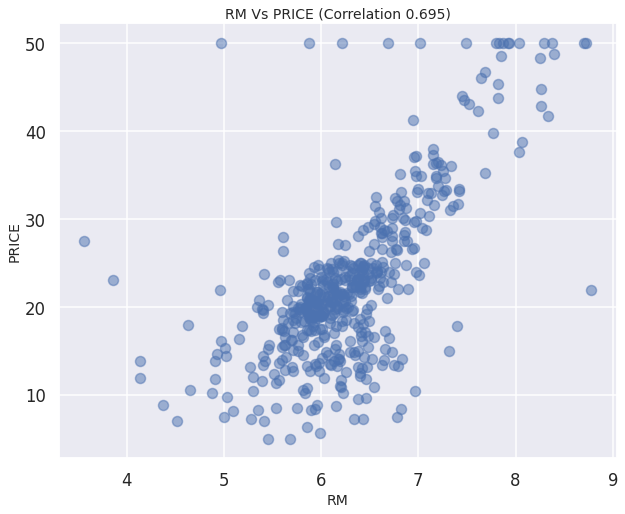

In [19]:
rm_price_corr = round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize=[10,8])

plt.scatter(data['RM'], data['PRICE'], alpha=0.5, s=100)

plt.title(f'RM Vs PRICE (Correlation {rm_price_corr})', fontsize=14)
plt.xlabel('RM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)

plt.show()

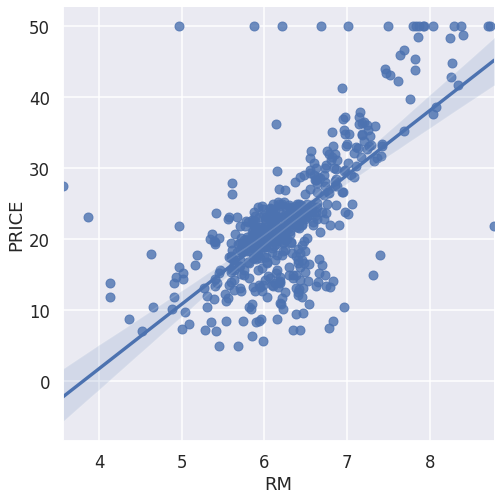

In [20]:
sns.lmplot(x='RM', y='PRICE', data=data, height=7)
plt.show()

### we are gonna shuffle and split training and testing

In [21]:

from sklearn.model_selection import train_test_split 

prices = data['PRICE']
feature = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, prices,
                                                   test_size=0.2, random_state=42)

In [22]:
print(X_test.shape)
X_train.shape

(102, 13)


(404, 13)

In [23]:
y_train.shape

(404,)

## Multivariable Regression

In [24]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [25]:
print('intercept: ', reg1.intercept_)
print('training data r-squared: ', reg1.score(X_train, y_train))
print('testing data r-squared: ', reg1.score(X_test, y_test))


pd.DataFrame(data=reg1.coef_, index=X_train.columns, columns=['coef'])

intercept:  30.246750993923776
training data r-squared:  0.7508856358979673
testing data r-squared:  0.6687594935356298


,coef
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


In [26]:
y_pred = reg1.predict(X_test)
acc_lin = r2_score(y_test,y_pred)
acc_lin

0.6687594935356298

## Data Transformations
### Data transformation is the process of changing the format, structure, or values of data.

In [27]:
# skew is the degree of distortion from a normal distribution.(The skewness for a normal distribution is zero)
y_normal = data['PRICE']
y_normal.skew()

1.1080984082549072

In [28]:
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

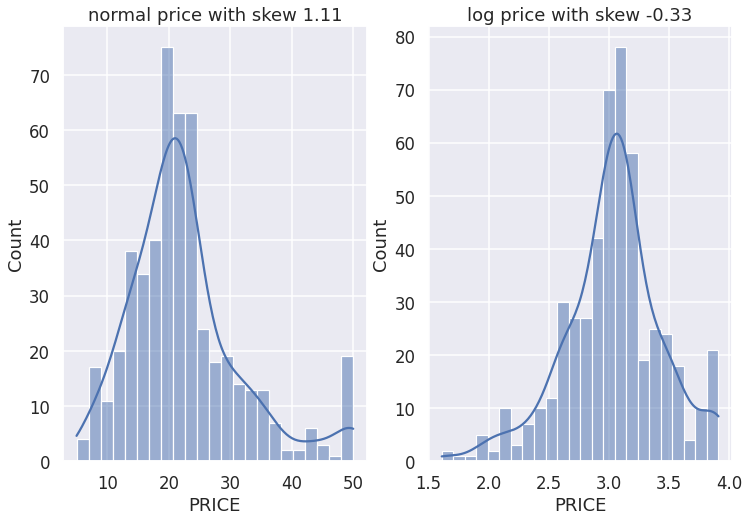

In [29]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))

sns.histplot(y_normal,ax=axes[0],kde=True)
axes[0].set_title(f'normal price with skew {np.round(y_normal.skew(),2)}')

sns.histplot(y_log,ax=axes[1],kde=True)
axes[1].set_title(f'log price with skew {np.round(y_log.skew(),2)}')

plt.show()

## Regression using log prices

In [30]:
prices_log = np.log(data['PRICE'])
feature = data.drop('PRICE', axis=1)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(feature, prices_log,
                                                   test_size=0.2, random_state=10)

reg2 = LinearRegression()
reg2.fit(X_train_log, y_train_log)

LinearRegression()

In [31]:
print('intercept: ', reg2.intercept_)
print('training data r-squared: ', reg2.score(X_train_log, y_train_log))
print('testing data r-squared: ', reg2.score(X_test_log, y_test_log))

pd.DataFrame(data=reg2.coef_, index=X_train_log.columns, columns=['coef'])

intercept:  4.059943871775195
training data r-squared:  0.7930234826697584
testing data r-squared:  0.7446922306260738


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [32]:
y_pred = reg2.predict(X_test_log)
acc_lin_log = r2_score(y_test_log,y_pred)
acc_lin_log

0.7446922306260738

## Using XGBoost Regressor

In [33]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [34]:
pred_y = xgb.predict(X_test)
acc_xgb = r2_score(y_test,pred_y)
acc_xgb

0.8882572485391531

## Using Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = rf_reg.predict(X_test)
acc_rf = r2_score(y_test,y_pred)
acc_rf

0.8836713738544227

## Select the best model

In [37]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression(log_price)', 'XGBoost', 'Random Forest'],
    'R-squared Score': [acc_lin*100, acc_lin_log*100, acc_xgb*100, acc_rf*100,]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,88.825725
3,Random Forest,88.367137
1,Linear Regression(log_price),74.469223
0,Linear Regression,66.875949
